In [1]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

Mounted at /content/gdrive


In [1]:
%matplotlib inline
import my_utils as mu
import math
import torch
from torch import nn
from torch.nn import functional as F

# The Task

* Our **Task** for this week is to the implement GRU layer, one of the most widely-used layers for Recurrent Neural Networks!
* The only task that you have to do is to write the code for the GRU layer (see below). The rest of the training pipeline is provided to you.
* The GRU layer is described by the following figure and equations.

# GRU Schematic Diagram

![ Hidden state computation in a GRU. As before, the multiplication is carried out elementwise. ](img/gru_3.svg)

<!-- ![ Hidden state computation in a GRU. As before, the multiplication is carried out elementwise. ](https://drive.google.com/uc?export=view&id=1_ZTvSMWMGvQruQent0FRKIgJ_7m9YqPE) -->   



# GRU Equations


$$
\begin{aligned}
\mathbf{R}_t = \sigma(\mathbf{X}_t \mathbf{W}_{xr} + \mathbf{H}_{t-1} \mathbf{W}_{hr} + \mathbf{b}_r),\\
\mathbf{Z}_t = \sigma(\mathbf{X}_t \mathbf{W}_{xz} + \mathbf{H}_{t-1} \mathbf{W}_{hz} + \mathbf{b}_z),
\end{aligned}
$$

and

$$\tilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t \mathbf{W}_{xh} + \left(\mathbf{R}_t \odot \mathbf{H}_{t-1}\right) \mathbf{W}_{hh} + \mathbf{b}_h),$$

and finally:

$$\mathbf{H}_t = \mathbf{Z}_t \odot \mathbf{H}_{t-1}  + (1 - \mathbf{Z}_t) \odot \tilde{\mathbf{H}}_t.$$




# GRU Implementation from Scratch


# Loading the Dataset

In [57]:
batch_size, num_steps = 32, 35
train_iter, vocab = mu.load_data_time_machine(batch_size, num_steps)

# Initializing Model Parameters

* The weights are drawn from a Gaussian with standard deviation to be $0.01$ and set the bias to $0$. 
* The hyperparameter `num_hiddens` defines the number of hidden units. 
* Weights and biases are instantiated for the update gate, the reset gate, and the candidate hidden state. 
* Gradients are attached to all the parameters.

In [29]:
def get_params(vocab_size, num_hiddens):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape)*0.01

    def three():
        return (normal((num_inputs, num_hiddens)),
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens))

    W_xz, W_hz, b_z = three()  # Update gate parameter
    W_xr, W_hr, b_r = three()  # Reset gate parameter
    W_xh, W_hh, b_h = three()  # Candidate hidden state parameter
    # Output layer parameters
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs)
    # Attach gradients
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

# Defining the Model

In [ ]:
# Hidden state init. function returns a tensor with zeros of shape (batch size, number of hidden units) 
def init_gru_state(batch_size, num_hiddens):
    return (torch.zeros((batch_size, num_hiddens)), )

# Your Task: 

* Implement GRU layer according to GRU Schematic Diagram and GRU Equations

In [ ]:
# for our example inputs is a tensor of dims 35 x 32 x 28, state is a tensor of dims 32 x 256, and 
# params=get_params(28, 256) are the model params
# The layer should return Y and new state H

def gru(inputs, state, params):
    #write your code here!
    
    return Y, (H,

In [59]:
class RNNModelScratch:  #@save
    """A RNN Model implemented from scratch."""
    def __init__(self, vocab_size, num_hiddens, get_params,
                 init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        #Y,  H = self.forward_fn(X, state, self.params)
        #print(Y.size(), H.size())
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens)

# Training and Prediction

* Training and prediction work are the same as in basic RNN. 

perplexity 1.1, 26252.0 tokens/sec on cpu
time traveller  it s against reason said filby  what reason said
traveller  it hapeens thatour consciousness moves intermitt


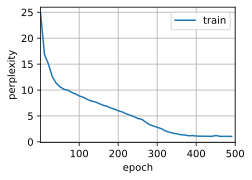

In [60]:
vocab_size, num_hiddens = len(vocab), 256
num_epochs, lr = 500, 1
model = RNNModelScratch(len(vocab), num_hiddens, get_params, init_gru_state, gru)
mu.train_ch8(model, train_iter, vocab, lr, num_epochs, device='cpu')